![title](ECG.png)

hbpermin-количество ударов в минуту

Pseg-отражает деполяризацию (возбуждение) предсердий. Проще говоря, это электрический импульс, который заставляет предсердия сокращаться и выталкивать кровь в желудочки.

PQseg-отражает время, необходимое для проведения электрического импульса от предсердий к желудочкам через атриовентрикулярный (АВ) узел.

QRSseg-важно для оценки функции проводящей системы сердца и выявления потенциальных нарушений в работе желудочков.

QRseg-изменения в QRseg могут быть связаны с различными патологиями сердца, включая блокады ножек пучка Гиса.

QTseg-изменения интервала QT могут указывать на различные кардиологические заболевания, такие как ишемия миокарда, кардиомиопатии и другие

RSseg-признаки гипертрофии (увеличения) желудочков, признаки ишемии или повреждения миокарда желудочков

STseg-изменения сегмента ST часто являются ранними признаками острого коронарного синдрома(Инфаркт)

Tseg-ишемию миокарда (недостаточный приток крови к сердцу)

RMSSD-показатель парасимпатической активности и может использоваться для оценки функции сердца и риска развития сердечно-сосудистых заболеваний

pNN50 используется для оценки активности парасимпатического отдела вегетативной нервной системы(стресс)

ARR-Аритмия - это любое отклонение от нормального синусового ритма сердца

AFF-Нерегулярные сокращения предсердий: Вместо нормальных координированных сокращений, предсердия "дрожат" или фибриллируют

CHF-это состояние, при котором сердце не может обеспечивать организм достаточным количеством крови, что приводит к накоплению жидкости в легких, печени, почках и других органах. Это может быть вызвано различными заболеваниями, такими как инфаркт миокарда, кардиомиопатия, артериальная гипертензия, заболевания клапанов сердца

NSR-сердечный ритм нормальный, а импульсы, запускающие сердцебиение, исходят из синусового узла, который является естественным "пейсмекером" сердца.

In [15]:
import numpy as np 
import pandas as pd 

# Зфгрузка датасета
df = pd.read_csv("ECGdata.csv")

# Показыеваем первые несколько строк датафрейма
df.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [16]:
# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()

# Показываем количество пропущенных значений в столбце
missing_values[missing_values > 0]

# Сводная статистика по датасету
df.describe(include='all')

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,432.000000,431.000000,1200.000000,1200.000000,1200.000000,1200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
mean,600.500000,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,...,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425,NaN
std,346.554469,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,...,112.292014,8.452832,25.070324,0.049705,0.073086,0.077532,0.026456,7.748445,10.325033,NaN
min,1.000000,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,...,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000,NaN
25%,300.750000,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,...,123.147741,0.000000,0.124186,-0.106660,0.082613,-0.240304,0.023853,1.000000,0.613497,NaN
50%,600.500000,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,...,183.603851,5.228299,19.904060,-0.058518,0.108418,-0.116241,0.034460,3.000000,3.680982,NaN
75%,900.250000,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,...,248.101035,14.355389,46.194325,-0.027685,0.229659,-0.087565,0.049778,10.000000,12.883436,NaN


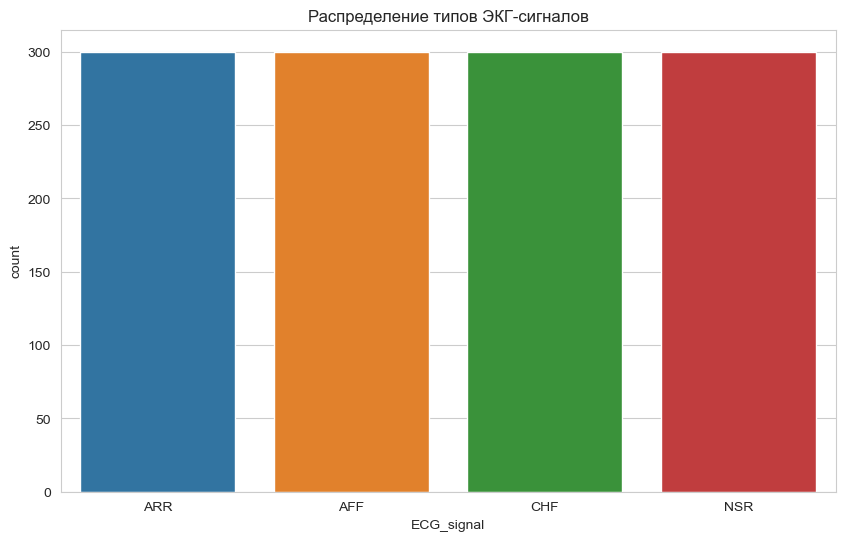

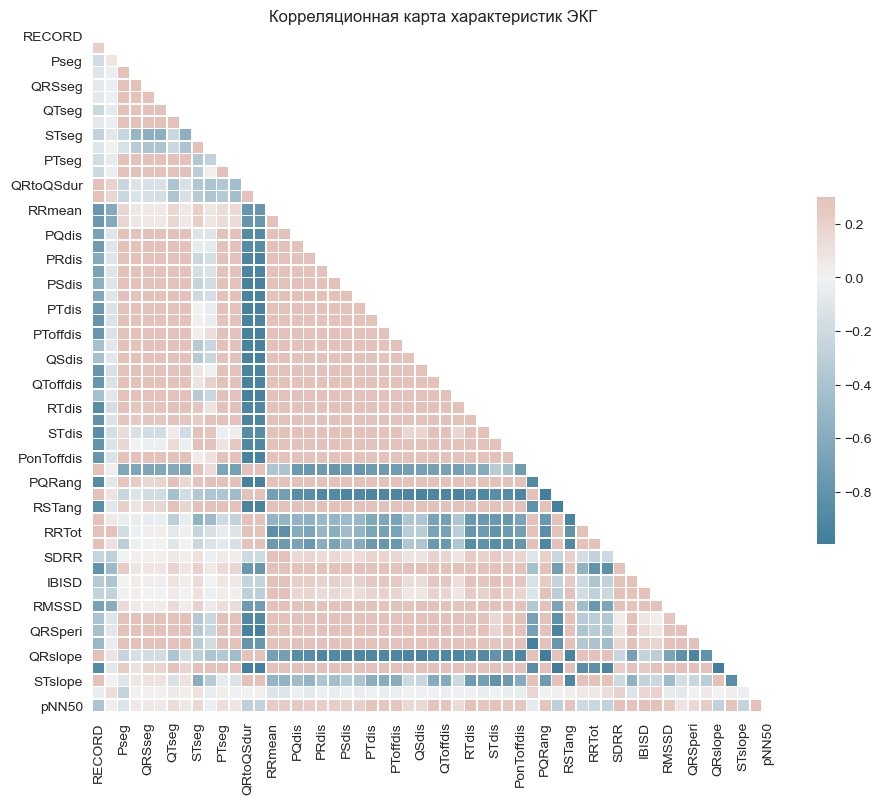

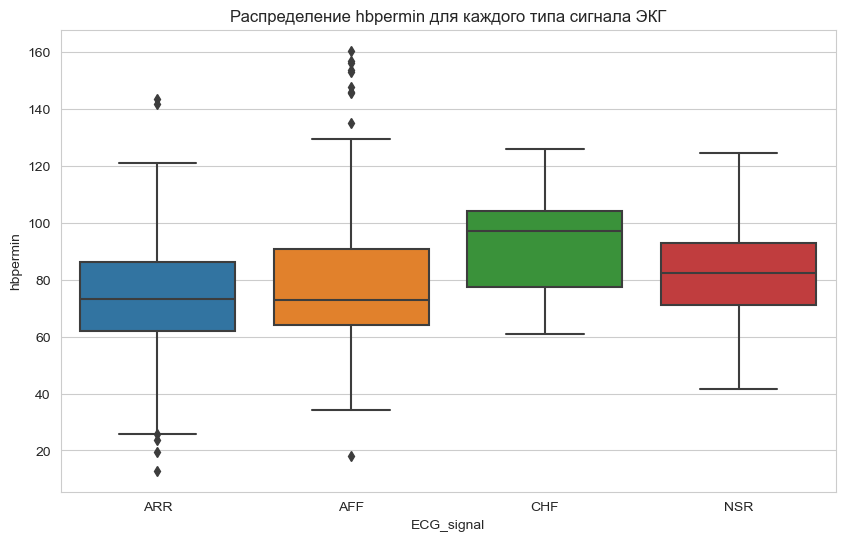

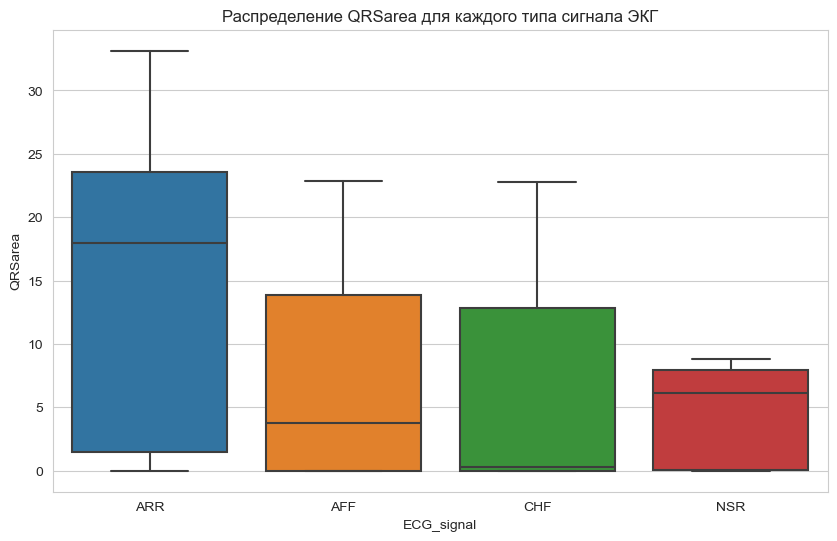

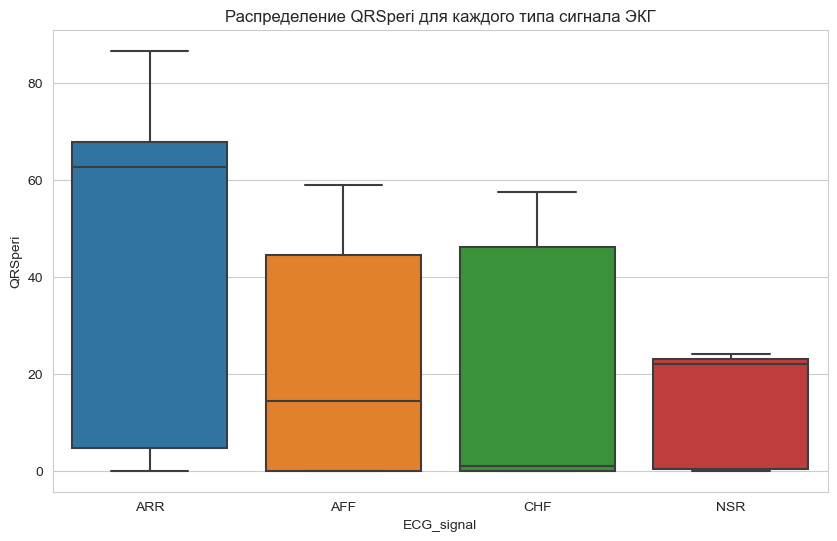

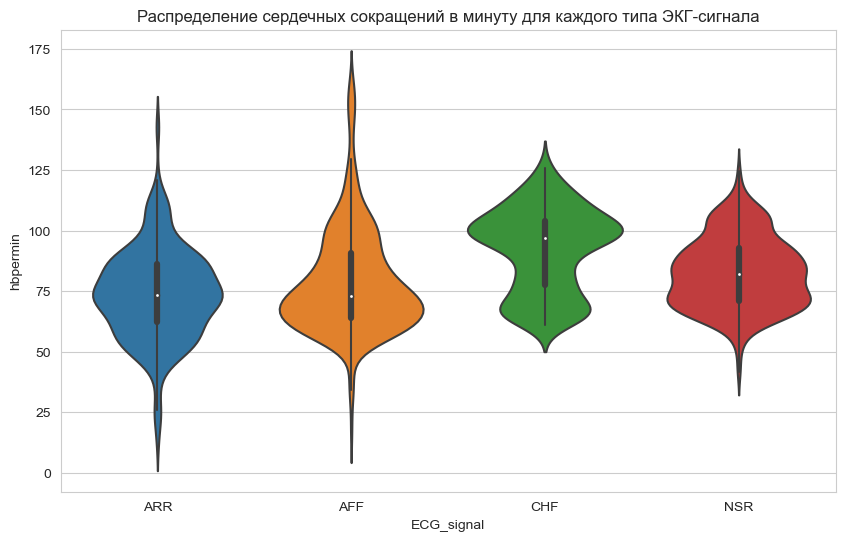

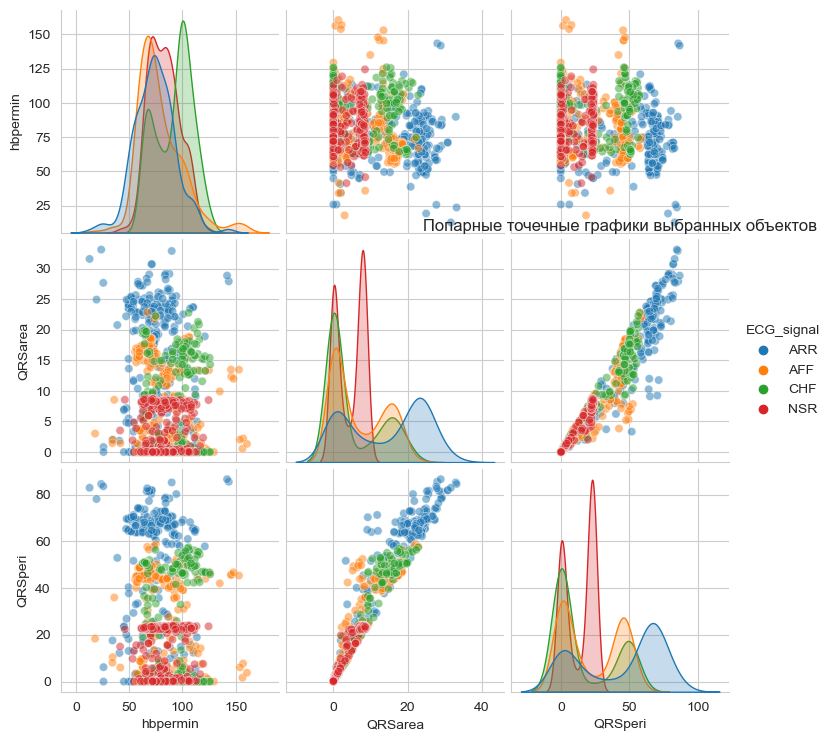

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля 
sns.set_style("whitegrid")

# Создание линейного графика для столбца ECG_signal
plt.figure(figsize=(10, 6))
sns.countplot(x='ECG_signal', data=df)
plt.title('Распределение типов ЭКГ-сигналов')
plt.show()

# Вычисление корреляционной матрицы
corr = df.corr()

# Создание маски 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Настройка фигуры matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Создание расходящеся цветовой карты
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создание тепловой карты с маской и правильным соотношением сторон
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Корреляционная карта характеристик ЭКГ')
plt.show()

# Заполние пропущенных значений медианой в соответствующих столбцах.
df_filled = df.fillna(df.median())

# Проверяем, нет ли еще каких-либо пропущенных значений
df_filled.isnull().sum().any()

# Выборка нескольких объектов для визуализации
features = ['hbpermin', 'QRSarea', 'QRSperi']

# Строим график распределения этих характеристик для каждого типа ЭКГ-сигнала.
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ECG_signal', y=feature, data=df_filled)
    plt.title(f'Распределение {feature} для каждого типа сигнала ЭКГ')
    plt.show()

# Распределение сердечных сокращений в минуту для каждого сигнала ЭКГ
plt.figure(figsize=(10, 6))
sns.violinplot(x='ECG_signal', y='hbpermin', data=df_filled)
plt.title('Распределение сердечных сокращений в минуту для каждого типа ЭКГ-сигнала')
plt.show()

# Попарные диаграммы рассеяния "hb в минуту", "Площадь QRS" и "Частота QRS" для каждого типа ЭКГ-сигнала.
sns.pairplot(df_filled, vars=['hbpermin', 'QRSarea', 'QRSperi'], hue='ECG_signal', plot_kws={'alpha': 0.5})
plt.title('Попарные точечные графики выбранных объектов')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Кодируем категориальную целевую переменную
le = LabelEncoder()
df_filled['ECG_signal'] = le.fit_transform(df_filled['ECG_signal'])

# Разделяем данные
X = df_filled.drop('ECG_signal', axis=1)
y = df_filled['ECG_signal']

# Разделяем данные на обучающие и тестовые наборы.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((960, 55), (240, 55), (960,), (240,))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Инициализируем классификатор случайных лесов
rf = RandomForestClassifier(random_state=42)

# Обучаем модель
rf.fit(X_train, y_train)

# Предсказываем метки тестового набора
y_pred = rf.predict(X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Запускаем модели
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Список моделей
models = [lr, svm, gbc]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Gradient Boosting Classifier']

# Обучение и оценка каждой модели
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

F:\anaconda3\envs\My_ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy: 0.9958333333333333
Support Vector Machine Accuracy: 0.9875
Gradient Boosting Classifier Accuracy: 1.0


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Бинаризуем метки для вычисления roc_auc_score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Создаем словарь для хранения оценок для каждой модели
scores = {}

# Вычисление показателей для каждой модели
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_score = model.decision_function(X_test) if name != 'Gradient Boosting Classifier' else model.predict_proba(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    
    scores[name] = [precision, recall, f1, roc_auc]

# Преобразование результатов во фрейм данных
scores_df = pd.DataFrame(scores, index=['Precision', 'Recall', 'F1 Score', 'ROC AUC']).transpose()

scores_df

,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.995902,0.995833,0.995832,0.913310
Support Vector Machine,0.987835,0.987500,0.987496,0.996312
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000


R2, или коэффициент детерминации (R-squared), и F1-score являются метриками оценки качества моделей машинного обучения, но они используются для разных задач и имеют различные интерпретации.

1. **R2 (коэффициент детерминации)** - это метрика, которая применяется для задач регрессии, где целью является предсказание непрерывной числовой величины. Значение R2 варьируется от 0 до 1, где 1 означает идеальное соответствие модели данным, а 0 означает, что модель не лучше, чем простое предсказание средним значением целевой переменной.

R2 показывает, насколько хорошо модель объясняет вариацию целевой переменной. Чем ближе значение R2 к 1, тем лучше модель описывает данные. Значение R2, близкое к 0, указывает на то, что модель плохо описывает данные.

2. **F1-score** - это метрика, которая используется для задач классификации, где целью является отнесение объектов к одному из нескольких классов. F1-score является гармоническим средним между precision (точностью) и recall (полнотой).

Precision показывает, какая доля объектов, отнесенных к классу, действительно принадлежит этому классу. Recall показывает, какая доля объектов, принадлежащих классу, была правильно классифицирована.

F1-score варьируется от 0 до 1, где 1 означает идеальную классификацию, а 0 - полное отсутствие релевантных результатов. Чем выше значение F1-score, тем лучше модель классифицирует объекты.

В задачах регрессии следует использовать R2, так как он напрямую оценивает качество предсказания непрерывной величины. В задачах классификации лучше использовать F1-score, так как он учитывает как precision, так и recall, что важно для многих практических приложениях.

В данном случае уместна метрика использующаяся для задач классификации - F1-score. 